In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
rng = np.random.RandomState(42)

In [3]:
movies_df = pd.read_pickle('movie-data.pkl')
movies_df = movies_df[movies_df['budget'] > 0]

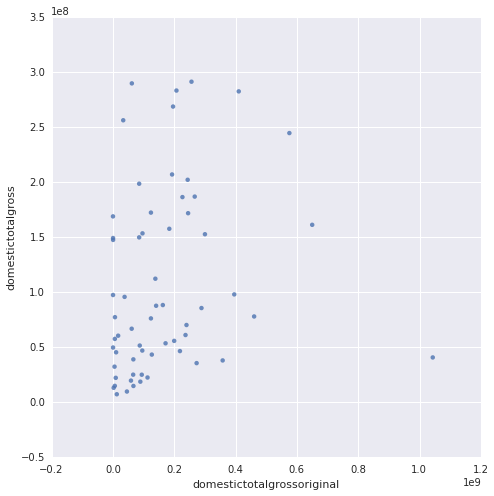

In [43]:
%matplotlib inline

sns.lmplot("domestictotalgrossoriginal", "domestictotalgross", data=movies_df, fit_reg = False, size=7)

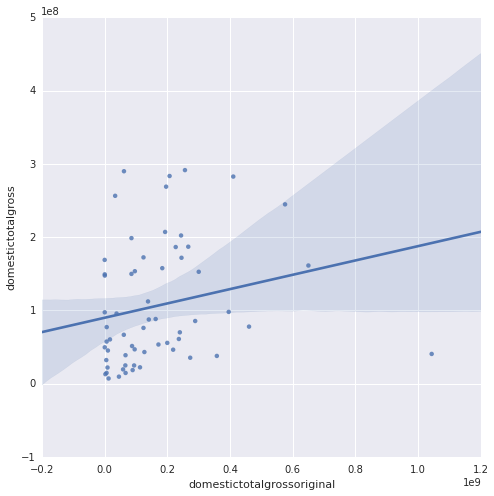

In [50]:
sns.lmplot("domestictotalgrossoriginal", "domestictotalgross", data=movies_df, size=7)

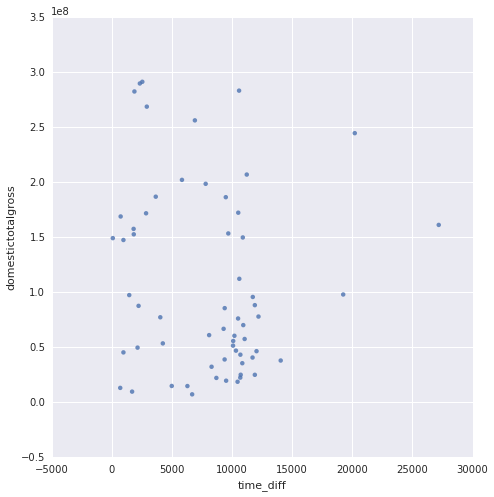

In [53]:
sns.lmplot("time_diff", "domestictotalgross", data=movies_df, fit_reg = False, size=7)

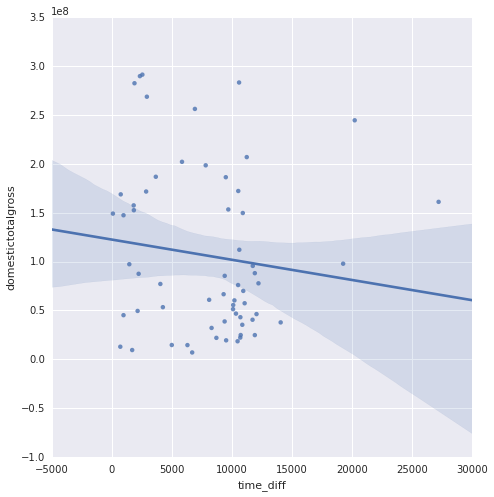

In [52]:
sns.lmplot("time_diff", "domestictotalgross", data=movies_df, size=7)

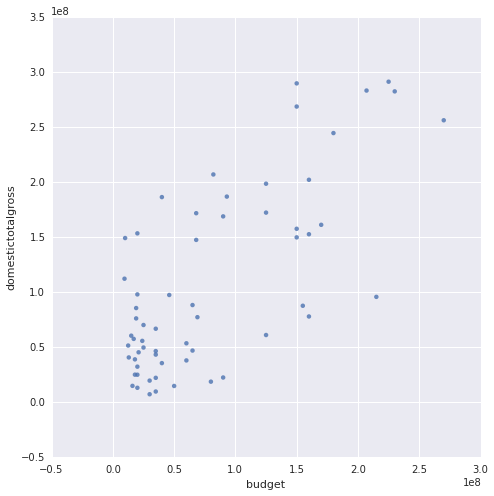

In [54]:
sns.lmplot("budget", "domestictotalgross", data=movies_df, fit_reg=False, size=7)

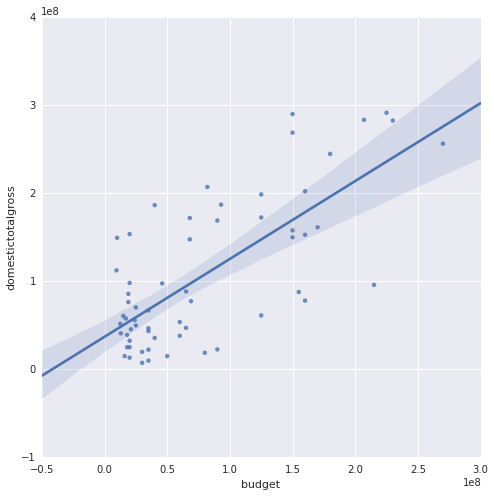

In [55]:
sns.lmplot("budget", "domestictotalgross", data=movies_df, size=7)

In [10]:
movies_df['loggross'] = (movies_df['domestictotalgross'].apply(np.log)).tolist()

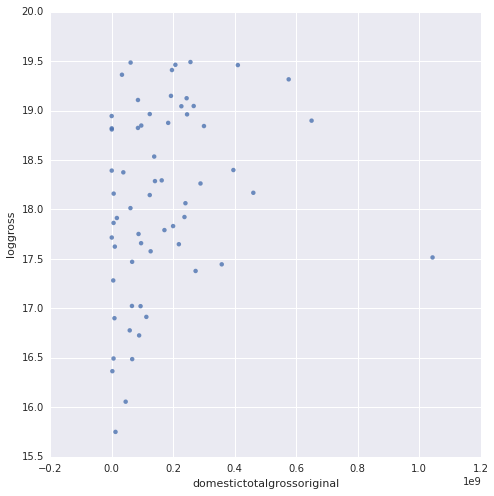

In [58]:
sns.lmplot("domestictotalgrossoriginal", "loggross", data=movies_df, fit_reg = False, size=7)

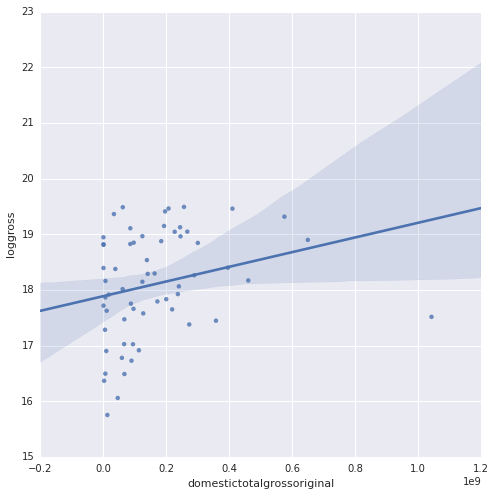

In [59]:
sns.lmplot("domestictotalgrossoriginal", "loggross", data=movies_df, size=7)

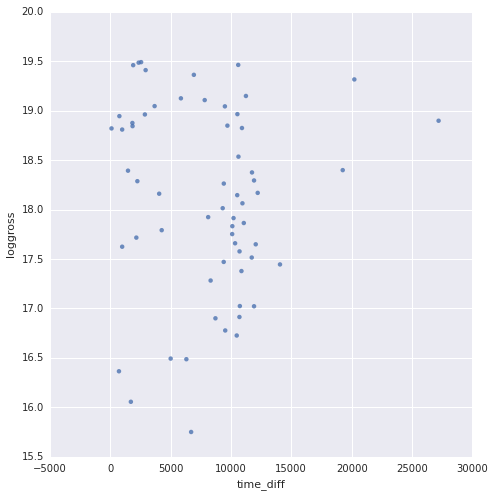

In [60]:
sns.lmplot("time_diff", "loggross", data=movies_df, fit_reg=False, size=7)

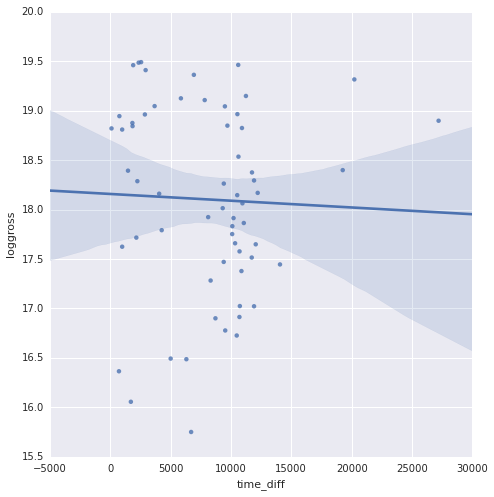

In [61]:
sns.lmplot("time_diff", "loggross", data=movies_df, size=7)

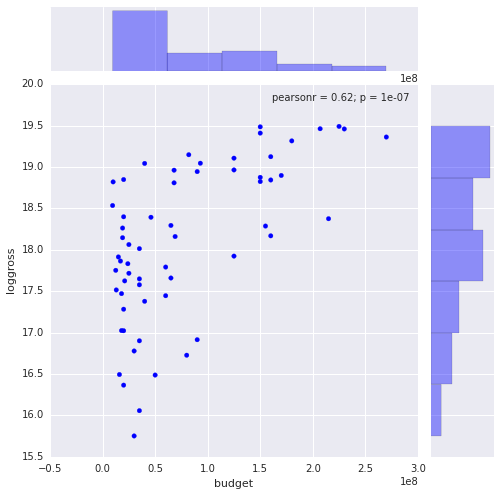

In [15]:
sns.jointplot("budget", "loggross", data=movies_df, color="b", size=7)

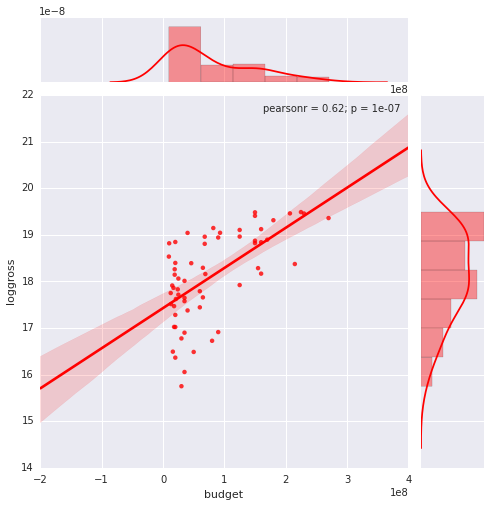

In [16]:
sns.jointplot("budget", "loggross", data=movies_df, kind="reg", color="r", size=7)

In [17]:
y, X = dmatrices('domestictotalgross ~ domestictotalgrossoriginal', data=movies_df, return_type='dataframe')

In [18]:
model1 = sm.OLS(y, X)
results1 = model1.fit()
res = results1.resid
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.861
Date:                Fri, 09 Oct 2015   Prob (F-statistic):             0.0960
Time:                        09:55:34   Log-Likelihood:                -1197.3
No. Observations:                  61   AIC:                             2399.
Df Residuals:                      59   BIC:                             2403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                    8.98e+07   1.42e+07      6.340      0.000      6.15e+07  1.18e+08
domestictotalgrossoriginal     0.0978      0.058      1.691      0.096        -0.018     0.214
==============================================================================
Omnibus:                        5.962   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                6.051
Skew:                           0.748   Prob(JB):                       0.0485
Kurtosis:                       2.625   Cond. No.                     3.29e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

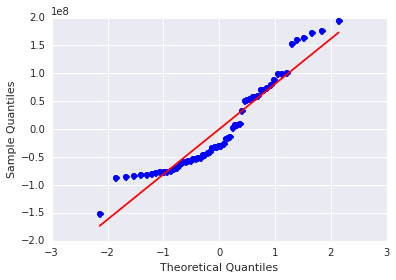

In [19]:
fig = sm.qqplot(res, line='s')
plt.show()

In [20]:
y2, X2 = dmatrices('np.log(domestictotalgross) ~ domestictotalgrossoriginal', data=movies_df, return_type='dataframe')

In [21]:
model2 = sm.OLS(y2, X2)
results2 = model2.fit()
res2 = results2.resid

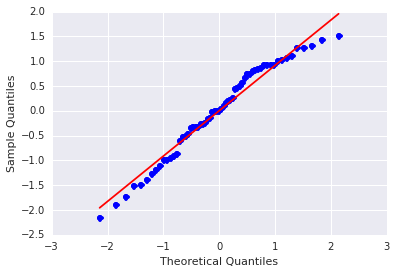

In [22]:
fig2 = sm.qqplot(res2, line='s')
plt.show()

In [42]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(domestictotalgross)   R-squared:                       0.065
Model:                                    OLS   Adj. R-squared:                  0.049
Method:                         Least Squares   F-statistic:                     4.075
Date:                        Fri, 09 Oct 2015   Prob (F-statistic):             0.0481
Time:                                09:56:06   Log-Likelihood:                -81.036
No. Observations:                          61   AIC:                             166.1
Df Residuals:                              59   BIC:                             170.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     17.8868      0.160    111.886      0.000        17.567    18.207
domestictotalgrossoriginal  1.318e-09   6.53e-10      2.019      0.048      1.15e-11  2.62e-09
==============================================================================
Omnibus:                        3.720   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.769
Skew:                          -0.375   Prob(JB):                        0.250
Kurtosis:                       2.273   Cond. No.                     3.29e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
y3, X3 = dmatrices('domestictotalgross ~ np.log(domestictotalgrossoriginal) + np.log(time_diff) + budget', data=movies_df, return_type='dataframe')

In [24]:
y3, X3 = dmatrices('domestictotalgross ~ np.log(domestictotalgrossoriginal) + np.log(time_diff) + budget', data=movies_df, return_type='dataframe')
model3 = sm.OLS(y3, X3)
results3 = model3.fit()

In [25]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     25.05
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           1.82e-10
Time:                        09:55:35   Log-Likelihood:                -1173.1
No. Observations:                  61   AIC:                             2354.
Df Residuals:                      57   BIC:                             2363.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                           1.088e+08   7.18e+07      1.515      0.135     -3.49e+07  2.52e+08
np.log(domestictotalgrossoriginal)  6.771e+06   5.03e+06      1.346      0.184      -3.3e+06  1.68e+07
np.log(time_diff)                  -2.175e+07   9.38e+06     -2.320      0.024     -4.05e+07 -2.98e+06
budget                                 0.8193      0.116      7.086      0.000         0.588     1.051
==============================================================================
Omnibus:                        0.933   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.882
Skew:                           0.066   Prob(JB):                        0.643
Kurtosis:                       2.426   Cond. No.                     1.03e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.1, random_state=42)
model3 = sm.OLS(y_train, X_train)
results3 = model3.fit()
res3 = results3.resid
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     24.45
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           7.01e-10
Time:                        09:55:35   Log-Likelihood:                -1037.1
No. Observations:                  54   AIC:                             2082.
Df Residuals:                      50   BIC:                             2090.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                           1.398e+08   7.39e+07      1.892      0.064     -8.63e+06  2.88e+08
np.log(domestictotalgrossoriginal)  6.396e+06   4.98e+06      1.285      0.205      -3.6e+06  1.64e+07
np.log(time_diff)                  -2.435e+07   9.41e+06     -2.588      0.013     -4.33e+07 -5.45e+06
budget                                 0.8010      0.117      6.852      0.000         0.566     1.036
==============================================================================
Omnibus:                        0.416   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.565
Skew:                          -0.019   Prob(JB):                        0.754
Kurtosis:                       2.500   Cond. No.                     1.07e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X_train

,Intercept,np.log(domestictotalgrossoriginal),np.log(time_diff),budget
55,1,20.292456,10.210641,170000000
12,1,19.796493,9.865162,20000000
44,1,16.655647,9.230241,15000000
37,1,15.649930,8.515392,16000000
67,1,13.324978,6.880384,68000000
16,1,15.670620,9.310367,17000000
3,1,18.908227,9.384294,65000000
60,1,17.331464,8.841304,270000000
17,1,18.007145,9.280239,18000000
8,1,18.635922,9.261129,125000000


In [28]:
results3.predict(X_test)

array([  4.22969663e+07,   6.12618302e+07,   8.12834517e+07,
         7.19113439e+07,   8.21042678e+07,   1.38492119e+08,
         9.02302350e+07])

In [29]:
y4, X4 = dmatrices('domestictotalgross ~ comedy + action + adventure + horror +'\
                   'romance + music + fantasy + drama + thriller + scifi', data=movies_df, return_type='dataframe')

In [30]:
model4 = sm.OLS(y4, X4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     3.936
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           0.000746
Time:                        09:55:35   Log-Likelihood:                -1182.7
No. Observations:                  61   AIC:                             2385.
Df Residuals:                      51   BIC:                             2406.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          6.836e+07   2.33e+07      2.933      0.005      2.16e+07  1.15e+08
comedy[T.True]      1.03e+06   1.58e+07      0.065      0.948     -3.06e+07  3.27e+07
action[T.True]     8.499e+06   2.35e+07      0.361      0.720     -3.88e+07  5.58e+07
adventure[T.True]  1.072e+08   2.65e+07      4.045      0.000       5.4e+07   1.6e+08
horror[T.True]    -4.847e+06   3.03e+07     -0.160      0.873     -6.56e+07  5.59e+07
romance[T.True]   -3.141e+07    5.3e+07     -0.593      0.556     -1.38e+08  7.49e+07
music[T.True]     -2.091e+07   4.52e+07     -0.463      0.645     -1.12e+08  6.98e+07
fantasy[T.True]     1.21e+08   4.47e+07      2.709      0.009      3.14e+07  2.11e+08
drama[T.True]      2.603e+07   3.39e+07      0.767      0.446     -4.21e+07  9.41e+07
thriller[T.True]    1.03e+06   1.58e+07      0.065      0.948     -3.06e+07  3.27e+07
scifi[T.True]      5.939e+07   3.29e+07      1.807      0.077      -6.6e+06  1.25e+08
==============================================================================
Omnibus:                        1.555   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                0.947
Skew:                          -0.280   Prob(JB):                        0.623
Kurtosis:                       3.242   Cond. No.                     3.78e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.61e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
y5, X5 = dmatrices('domestictotalgross ~ np.log(domestictotalgrossoriginal) + np.log(time_diff) + comedy + action + adventure + horror +'\
                   'romance + music + fantasy + drama + thriller + scifi + budget', data=movies_df, return_type='dataframe')

In [32]:
model5 = sm.OLS(y5, X5)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     8.323
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           3.45e-08
Time:                        09:55:35   Log-Likelihood:                -1164.4
No. Observations:                  61   AIC:                             2355.
Df Residuals:                      48   BIC:                             2382.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                           1.178e+08   7.14e+07      1.650      0.106     -2.58e+07  2.61e+08
comedy[T.True]                      1.655e+07   1.24e+07      1.332      0.189     -8.43e+06  4.15e+07
action[T.True]                     -1.749e+07    1.9e+07     -0.920      0.362     -5.57e+07  2.07e+07
adventure[T.True]                   5.484e+07   2.23e+07      2.456      0.018      9.95e+06  9.97e+07
horror[T.True]                      3.907e+07   2.46e+07      1.590      0.118     -1.03e+07  8.85e+07
romance[T.True]                     1.086e+07   4.14e+07      0.262      0.794     -7.23e+07  9.41e+07
music[T.True]                       1.233e+07   3.55e+07      0.347      0.730     -5.91e+07  8.38e+07
fantasy[T.True]                     9.416e+07   3.55e+07      2.652      0.011      2.28e+07  1.66e+08
drama[T.True]                       4.549e+07   2.61e+07      1.741      0.088     -7.05e+06   9.8e+07
thriller[T.True]                    1.655e+07   1.24e+07      1.332      0.189     -8.43e+06  4.15e+07
scifi[T.True]                        3.67e+07   2.57e+07      1.431      0.159     -1.49e+07  8.83e+07
np.log(domestictotalgrossoriginal)  6.979e+06   5.11e+06      1.367      0.178     -3.29e+06  1.72e+07
np.log(time_diff)                  -2.667e+07   9.53e+06     -2.797      0.007     -4.58e+07  -7.5e+06
budget                                 0.7944      0.147      5.413      0.000         0.499     1.089
==============================================================================
Omnibus:                        0.698   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.777
Skew:                           0.233   Prob(JB):                        0.678
Kurtosis:                       2.703   Cond. No.                     3.25e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.19e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
predicts = results5.predict()
actuals = y5['domestictotalgross'].tolist()
predicts - actuals

array([  2.24957619e+06,  -7.42806227e+06,  -2.13794458e+07,
        -2.46116535e+07,   3.52006599e+07,   1.85163791e+07,
        -7.39409311e+07,   3.16779698e+07,   2.21274169e+07,
         5.18305324e+07,  -2.41198737e+07,   1.69537259e+07,
        -4.35298294e+07,   7.29186282e+07,   3.76631038e+07,
        -2.24957723e+06,  -2.58290311e+07,   4.33833573e+07,
         1.43192475e+07,  -1.87717049e+07,  -8.85819543e+06,
        -2.08416167e+07,   4.19649171e+07,   5.94653983e+07,
        -3.44735436e+07,  -1.38616088e+07,   3.11640769e+07,
         4.94356532e+07,  -4.69793122e+07,   8.06501776e+07,
         4.23620323e+06,  -1.18697406e+08,  -5.97343633e+07,
        -1.88167119e+06,   8.77704235e+07,   6.50068198e+07,
        -1.06452327e+08,  -1.39490303e+07,  -1.32692222e+07,
        -3.14592104e+07,  -2.13256223e+07,  -4.18573858e+05,
        -6.53053634e+06,  -5.93126292e+07,   2.19369198e+07,
         8.34983514e+07,   1.05553504e+07,   4.35562677e+07,
        -1.29472107e+07,

In [34]:
clf = DecisionTreeRegressor(min_samples_split=3)
clf = clf.fit(X_train, y_train)

In [35]:
print clf.score(X_train, y_train)
predicts = clf.predict(X_test)
actuals = y_test['domestictotalgross'].tolist()

0.963095284542


In [36]:
mse = ((predicts - actuals) ** 2).mean()
print mse

3.27529235208e+15


In [37]:
clf_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                          n_estimators=30, random_state=rng)
clf_2.fit(X_train, y_train['domestictotalgross'])

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=30,
         random_state=<mtrand.RandomState object at 0x10df60210>)

In [38]:
print clf_2.score(X_train, y_train)
predicts2 = clf_2.predict(X_test)

0.988647368604


In [39]:
predicts - actuals

array([  8.98130000e+06,   3.90136000e+07,   1.37300000e+05,
        -1.17021100e+08,   2.82220000e+07,  -8.19986500e+07,
         1.04931000e+07])

In [40]:
clf_2.feature_importances_

array([ 0.        ,  0.25361436,  0.18974416,  0.55664148])

In [41]:
mean_squared_error(actuals, predicts2)

5581901438176071.0

In [80]:
y2, X2 = dmatrices('np.log(domestictotalgross) ~ domestictotalgrossoriginal', data=movies_df, return_type='dataframe')
model2 = sm.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(domestictotalgross)   R-squared:                       0.065
Model:                                    OLS   Adj. R-squared:                  0.049
Method:                         Least Squares   F-statistic:                     4.075
Date:                        Fri, 09 Oct 2015   Prob (F-statistic):             0.0481
Time:                                10:44:10   Log-Likelihood:                -81.036
No. Observations:                          61   AIC:                             166.1
Df Residuals:                              59   BIC:                             170.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     17.8868      0.160    111.886      0.000        17.567    18.207
domestictotalgrossoriginal  1.318e-09   6.53e-10      2.019      0.048      1.15e-11  2.62e-09
==============================================================================
Omnibus:                        3.720   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.769
Skew:                          -0.375   Prob(JB):                        0.250
Kurtosis:                       2.273   Cond. No.                     3.29e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
preds = results2.predict()
actuals = y['domestictotalgross']
print mean_squared_error(actuals, preds)

1.8064330943e+16


In [72]:
y3, X3 = dmatrices('domestictotalgross ~ time_diff', data=movies_df, return_type='dataframe')
model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9922
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.323
Time:                        10:33:08   Log-Likelihood:                -1198.2
No. Observations:                  61   AIC:                             2400.
Df Residuals:                      59   BIC:                             2405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.225e+08   1.99e+07      6.159      0.000      8.27e+07  1.62e+08
time_diff  -2069.8999   2078.057     -0.996      0.323     -6228.082  2088.282
==============================================================================
Omnibus:                        6.665   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.650
Skew:                           0.764   Prob(JB):                       0.0360
Kurtosis:                       2.471   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
preds = results3.predict()
actuals = y['domestictotalgross']
print mean_squared_error(actuals, preds)

6.75416526923e+15


In [74]:
y3, X3 = dmatrices('domestictotalgross ~ budget', data=movies_df, return_type='dataframe')
model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     65.91
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           3.45e-11
Time:                        10:33:41   Log-Likelihood:                -1175.9
No. Observations:                  61   AIC:                             2356.
Df Residuals:                      59   BIC:                             2360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.656e+07   1.13e+07      3.234      0.002      1.39e+07  5.92e+07
budget         0.8857      0.109      8.118      0.000         0.667     1.104
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.783
Skew:                           0.169   Prob(JB):                        0.676
Kurtosis:                       2.560   Cond. No.                     1.58e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
preds = results3.predict()
actuals = y['domestictotalgross']
print mean_squared_error(actuals, preds)

3.24392279322e+15


In [82]:
y3, X3 = dmatrices('domestictotalgross ~ domestictotalgrossoriginal + time_diff + budget', data=movies_df, return_type='dataframe')
model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     23.41
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           5.30e-10
Time:                        11:18:04   Log-Likelihood:                -1174.3
No. Observations:                  61   AIC:                             2357.
Df Residuals:                      57   BIC:                             2365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   5.239e+07   1.63e+07      3.216      0.002      1.98e+07   8.5e+07
domestictotalgrossoriginal     0.0606      0.048      1.272      0.209        -0.035     0.156
time_diff                  -2761.8301   1640.327     -1.684      0.098     -6046.529   522.869
budget                         0.8413      0.113      7.462      0.000         0.616     1.067
==============================================================================
Omnibus:                        1.295   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.167
Skew:                           0.172   Prob(JB):                        0.558
Kurtosis:                       2.416   Cond. No.                     5.63e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
preds = results3.predict()
actuals = y['domestictotalgross']
print mean_squared_error(actuals, preds)

3.07693970918e+15
